In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

In [2]:
df = pd.read_csv('area_price.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000
5,4200,758750
6,4400,767500
7,4600,796250
8,4800,812000
9,5000,837750


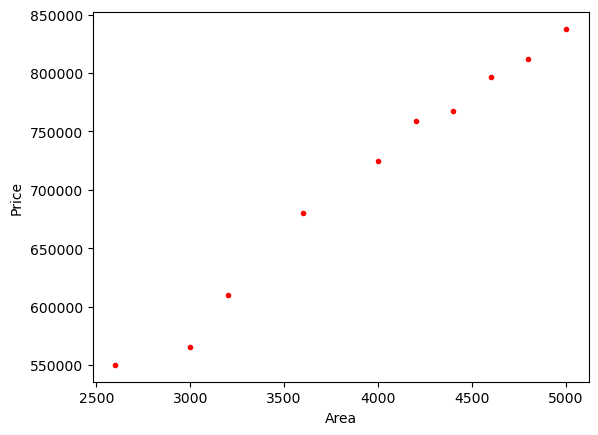

In [3]:
plt.scatter(df['area'], df['price'], c='red', marker='.')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [4]:
new_df = df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,4200
6,4400
7,4600
8,4800
9,5000


In [5]:
price = df.price

In [6]:
regressor = lm.LinearRegression()
regressor.fit(new_df, price)

LinearRegression()

In [7]:
regressor.predict([[3300]]) # just checking for the models output

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628660.11141121])

In [8]:
m = regressor.coef_[0]
m

127.44513841998653

In [9]:
c = regressor.intercept_
c

208091.15462525305

In [10]:
m * 3300 + c

628660.1114112086

In [11]:
m * 5200 + c

870805.874409183

In [16]:
new_df = pd.read_csv('areas.csv')
new_df_len = new_df.__len__()
predicted = [regressor.predict(new_df).round(3)[_] for _ in range(new_df_len)]
print(*[new_df.area[_] for _ in range(new_df_len)], sep='\n', end='\n\n')
print(*predicted, sep='\n')

1000
1500
2300
3540
4120
4560
5490
3460
4750
4750
2300
9000
8600

335536.293
399258.862
501214.973
659246.945
733165.125
789240.986
907764.965
649051.334
813455.562
813455.562
501214.973
1355097.4
1304119.345


In [ ]:
new_df['predicted_price'] = predicted
new_df

,area,predicted_price
0,1000,335536.293
1,1500,399258.862
2,2300,501214.973
3,3540,659246.945
4,4120,733165.125
5,4560,789240.986
6,5490,907764.965
7,3460,649051.334
8,4750,813455.562
9,4750,813455.562


In [32]:
new_df.to_csv('predicted_out.csv')

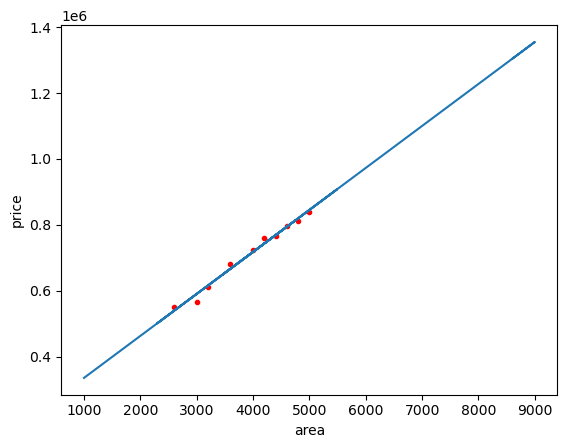

In [ ]:
plt.plot(new_df['area'], new_df['predicted_price'])
plt.scatter(df['area'], df['price'], c='red', marker='.')
plt.xlabel('area')
plt.ylabel('price')
plt.show()